In [179]:
%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import collections

In [180]:
df = pd.read_csv("Dataset/adult.csv")
df = df.replace(" ",np.nan)
df.head()

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Handling missing values
We need to fill the missing values of WorkClass which depends on Age.

In [181]:
df["Education"].isnull().values.any()

False

In [182]:
df["WorkClass"].isnull().values.any()

True

In [183]:
df["Edu_num"].isnull().values.any()

False

In [184]:
df["Sex"].isnull().values.any()

False

In [185]:
df["Relationship"].isnull().values.any()

False

In [186]:
df["Marital_stat"].isnull().values.any()

False

In [187]:
df["Occupation"].isnull().values.any()

True

In [188]:
df["Race"].isnull().values.any()

False

In [189]:
df["cpt_gain"].isnull().values.any()

False

In [190]:
df["Native_country"].isnull().values.any()

True

In [191]:
df["Salary"].isnull().values.any()

False

In [192]:
df_temp = df
x = 0
y = 20

temp = []
while (x<=80):
    workclass = []
    for index, row in df_temp.iterrows():
        if (row["Age"] > x) and (row["Age"] <= y):
            workclass.append(row["WorkClass"])
    x = x + 20
    y = y + 20
    temp.append(st.mode(workclass))
list(temp)

df = df_temp

df_temp["WorkClass"].fillna("Private",inplace=True)

Check if all null values are filled

In [193]:
df_temp["WorkClass"].isnull().values.any()

False

### Handling NaN value for Occupation attribute.Occupation is dependent on education qualification of a person that is Education 

In [194]:
df_temp = df
Uni_edu = df["Education"].unique()


dicts = {}
grouped = df_temp.groupby('Education')
for name,group in grouped:
    mode = st.mode(group["Occupation"])
    dicts[name] = mode

df.Occupation = df.Occupation.fillna(df.Education.map(dicts))

Check if all null values are filled

In [195]:
df_temp["WorkClass"].isnull().values.any()

False

## OUTLIERS

### Age

For attribute Age, we consider persons with frequency(or count) of less than 10 for a particular age as outliers 

In [196]:
df_temp = df.groupby('Age')["Education"].count()
dicts = {}
agelist=[]
for index_val, series_val in df_temp.iteritems():
    if series_val < 10:
        dicts[index_val] = series_val
        agelist.append(index_val)
print(dicts)
print(agelist)

{83: 6, 85: 3, 86: 1, 87: 1, 88: 3}
[83, 85, 86, 87, 88]


We just need to remove tuples from main dataframe with age whose count is less than 10

In [197]:
for ageval in agelist:
    df = df[df.Age != ageval]
df.Age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 82, 84],
      dtype=int64)

 ### Workclass

In [198]:
df_temp = df.groupby('WorkClass')["Education"].count()
df_temp

WorkClass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22691
 Self-emp-inc         1113
 Self-emp-not-inc     2537
 State-gov            1298
 Without-pay            14
Private               1834
Name: Education, dtype: int64

The values of class "Never-worked" and "Without-pay" are negligible when compared with values of other classes. Hence, we need to remove the rows with attributes "Never-worked" and "Without-pay"

In [199]:
df = df[df.WorkClass != " Never-worked"]
df = df[df.WorkClass != " Without-pay"]
df.WorkClass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Private', ' Self-emp-inc'], dtype=object)

 ### Final Weight

In [200]:
#Visualization

# sns.boxplot(x="Final_wt",y="Salary",data=df,palette='husl')

#Showing data points along with boxplot
#sns.swarmplot(x="Final_wt",y="Salary",data=df)
df_temp = df
# df_temp = df.groupby('Salary')["Final_wt"].count()
df_temp.Final_wt.min()
df_temp.Final_wt.max()

1484705

Now calculating the count for persons with final_wt value greater than 400000(count is 280) for case of salary>50k and value greater than 451000(count = 511) for case of salary<=50k 

In [201]:
df = df[(df.Final_wt < 400000) & (df.Salary == ' >50K') | (df.Final_wt < 451000) & (df.Salary == ' <=50K')]

df_temp = df[(df.Final_wt >= 400000) & (df.Salary == ' >50K') | (df.Final_wt >= 451000) & (df.Salary == ' <=50K')]
df_temp.count()

Age               0
WorkClass         0
Final_wt          0
Education         0
Edu_num           0
Marital_stat      0
Occupation        0
Relationship      0
Race              0
Sex               0
cpt_gain          0
cpt_loss          0
Hr_per_week       0
Native_country    0
Salary            0
dtype: int64

### Education number

In [202]:
df_temp = df.groupby('Edu_num').count()
df_temp.head()

,Age,WorkClass,Final_wt,Education,Marital_stat,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Edu_num,,,,,,,,,,,,,,
1,48,48,48,48,48,48,48,48,48,48,48,48,47,48
2,159,159,159,159,159,159,159,159,159,159,159,159,154,159
3,319,319,319,319,319,319,319,319,319,319,319,319,304,319
4,628,628,628,628,628,628,628,628,628,628,628,628,609,628
5,496,496,496,496,496,496,496,496,496,496,496,496,488,496


### Marital status

In [203]:
df.Marital_stat.unique()
df_temp = df.groupby('Marital_stat').count()
df_temp.head()

,Age,WorkClass,Final_wt,Education,Edu_num,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Marital_stat,,,,,,,,,,,,,,
Divorced,4353,4353,4353,4353,4353,4353,4353,4353,4353,4353,4353,4353,4306,4353
Married-AF-spouse,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Married-civ-spouse,14581,14581,14581,14581,14581,14581,14581,14581,14581,14581,14581,14581,14304,14581
Married-spouse-absent,407,407,407,407,407,407,407,407,407,407,407,407,387,407
Never-married,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10226,10417


### Occupation

In [204]:
df.Occupation.unique()
df_temp = df.groupby('Occupation').count()
df_temp.head()

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Occupation,,,,,,,,,,,,,,
Adm-clerical,4238,4238,4238,4238,4238,4238,4238,4238,4238,4238,4238,4238,4183,4238
Armed-Forces,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Craft-repair,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4559,4636
Exec-managerial,3960,3960,3960,3960,3960,3960,3960,3960,3960,3960,3960,3960,3887,3960
Farming-fishing,961,961,961,961,961,961,961,961,961,961,961,961,956,961


### Relationship

In [205]:
df.Relationship.unique()
df_temp = df.groupby('Relationship').count()
df_temp.head()

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Relationship,,,,,,,,,,,,,,
Husband,12844,12844,12844,12844,12844,12844,12844,12844,12844,12844,12844,12844,12605,12844
Not-in-family,8113,8113,8113,8113,8113,8113,8113,8113,8113,8113,8113,8113,7968,8113
Other-relative,951,951,951,951,951,951,951,951,951,951,951,951,922,951
Own-child,4955,4955,4955,4955,4955,4955,4955,4955,4955,4955,4955,4955,4893,4955
Unmarried,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3299,3358


### Attribute Gender

In [206]:
df_temp = df.groupby('Sex').count()
df_temp
#Distribution is uniform so no need of outlier removal......

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Race,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Sex,,,,,,,,,,,,,,
Female,10558,10558,10558,10558,10558,10558,10558,10558,10558,10558,10558,10558,10396,10558
Male,21192,21192,21192,21192,21192,21192,21192,21192,21192,21192,21192,21192,20786,21192


### Attribute Race

In [207]:
df_temp = df.groupby('Race').count()
df_temp

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Race,,,,,,,,,,,,,,
Amer-Indian-Eskimo,311,311,311,311,311,311,311,311,311,311,311,311,311,311
Asian-Pac-Islander,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,953,1033
Black,2948,2948,2948,2948,2948,2948,2948,2948,2948,2948,2948,2948,2858,2948
Other,268,268,268,268,268,268,268,268,268,268,268,268,250,268
White,27190,27190,27190,27190,27190,27190,27190,27190,27190,27190,27190,27190,26810,27190


## Normalization 

For numeric attribute Final_wt

In [208]:
ft_min = df.Final_wt.min()
ft_max = df.Final_wt.max()
df["Final_wt"] = (df["Final_wt"]-ft_min)/(ft_max - ft_min)
df.head()

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
0,39,State-gov,0.148712,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,0.161924,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,0.463618,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,0.507105,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,0.743491,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


For ATTRIBUTE Hr_per_week

In [209]:
hr_per_week_min = df.Hr_per_week.min()
hr_per_week_max = df.Hr_per_week.max()
print(hr_per_week_max, hr_per_week_min)
#This attribute doent need to be normalized because range is less .....

99 1


For Attribute Edu_num

In [210]:
Edu_num_min = df.Hr_per_week.min()
Edu_num_max = df.Hr_per_week.max()
print(Edu_num_min,Edu_num_max)

1 99


## Reduction

Count for non-zero values for capital gain attribute.

In [211]:
df_temp1 = df
df_temp1 = df_temp1[df_temp1["cpt_gain"] > 0]
df_temp1.count()

Age               2635
WorkClass         2635
Final_wt          2635
Education         2635
Edu_num           2635
Marital_stat      2635
Occupation        2635
Relationship      2635
Race              2635
Sex               2635
cpt_gain          2635
cpt_loss          2635
Hr_per_week       2635
Native_country    2583
Salary            2635
dtype: int64

Count for non-zero values for capital loss attribute.


In [212]:
df_temp1 = df
df_temp1 = df_temp1[df_temp1["cpt_loss"] > 0]
df_temp1.count()

Age               1484
WorkClass         1484
Final_wt          1484
Education         1484
Edu_num           1484
Marital_stat      1484
Occupation        1484
Relationship      1484
Race              1484
Sex               1484
cpt_gain          1484
cpt_loss          1484
Hr_per_week       1484
Native_country    1448
Salary            1484
dtype: int64

Number of non-zero values for both the attibutes in the dataframe were very less and in UCI ML library no description for these attributes were provided,Hence we drop these attributes(cpt_gain, cpt_loss)
Also, we are unable to fill the null values for native country we are droping the column

In [213]:
df = df.drop(['cpt_gain','cpt_loss','Native_country'],axis=1)
df.head()

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Race,Sex,Hr_per_week,Salary
0,39,State-gov,0.148712,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,0.161924,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,0.463618,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,0.507105,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,0.743491,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


## Coorelation

Between Education and occupation

In [214]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [215]:
df_temp = df.groupby(['Education','Occupation'])['Age'].count()
df_temp = pd.Series.to_frame(df_temp)
df_temp
occupation = [' Adm-clerical',' Craft-repair',' Exec-managerial',' Farming-fishing',' Handlers-cleaners',' Machine-op-inspct',' Other-service',' Priv-house-serv',' Prof-specialty',' Protective-serv',' Sales',' Tech-support',' Transport-moving',' Armed-Forces']

df_temp = df_temp.reset_index()

for education in df_temp.Education.unique():
    df_temp2 = df_temp[df_temp.Education == education]
    occupations_temp2 = df_temp2['Occupation'].tolist()
    unlisted_occupations = list(set(occupation)-set(occupations_temp2))
    for unlisted_occupation in unlisted_occupations:
        df_temp.loc[len(df_temp)] = [education, unlisted_occupation, 0]
    
df_temp2 = df_temp.groupby(['Education', 'Occupation'])['Age'].mean()
df_temp2 = df_temp2.reset_index()
age_matrix = []
for education in df_temp2.Education.unique():
    age_matrix.append(df_temp2[df_temp2.Education == education].Age.tolist())
age_matrix = np.array(age_matrix)
age_matrix.shape

(16, 14)

In [216]:
edu_sum = age_matrix.sum(axis=1).reshape(16, 1)
occu_sum = age_matrix.sum(axis=0).reshape(14, 1)

In [217]:
final_sum = edu_sum.sum()
final_sum

expected_matrix = np.dot(edu_sum, occu_sum.T) / final_sum
chi_square = (np.power(age_matrix - expected_matrix, 2) / expected_matrix).sum()
chi_square

17845.799015124725

In [218]:
degrees_of_freedom = (edu_sum.shape[0]-1)*(occu_sum.shape[0] - 1)
degrees_of_freedom

195

 P value for 195 degrees of freedom and 0.05 LOS is 228.580.<br>
 Since 228.580 < χ2(17845.799015124725), hence our hypothesis that education and occupation are independant is rejected.<br>
 Hence we conclude that the two attributes Education and Occupation are dependant.

## Visualisation

In [219]:
barplot = df
# barplot.iloc[:,0]
x=0
y=20
for i in range(5):
    mask = ((barplot.Age > x) & (barplot.Age <= y))
    barplot["Age"] = barplot["Age"].replace(barplot.loc[mask]["Age"], i)
    x += 20
    y += 20

In [220]:

# barplot.head(100)

lista = [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',' Local-gov', np.nan, ' Self-emp-inc', ' Without-pay', ' Never-worked']

a = []
b = []
c = []
d = []
e = []



for x in lista:
    count1=0
    count2=0
    count3=0
    count4=0
    count5=0
    for index, row in barplot.iterrows():
        if (row["Age"] == 0) and (row["WorkClass"] == x):
            count1 += 1
        if (row["Age"] == 1) and (row["WorkClass"] == x):
            count2 += 1
        if (row["Age"] == 2) and (row["WorkClass"] == x):
            count3 += 1
        if (row["Age"] == 3) and (row["WorkClass"] == x):
            count4 += 1
        if (row["Age"] == 4) and (row["WorkClass"] == x):
            count5 += 1
    a.append(count1)
    b.append(count2)
    c.append(count3)
    d.append(count4)
    e.append(count5)


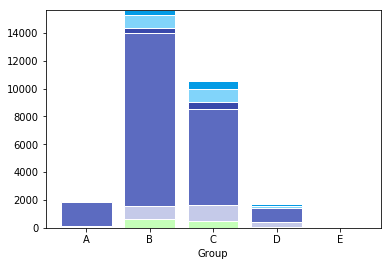

In [221]:
r = [0,1,2,3,4]
barwidth = 0.8
names = ('A','B','C','D','E')

age_np = np.array([a, b, c, d, e])
age_np = age_np.T

plt.bar(r, age_np[0], color='#c5ffb9', edgecolor='white', width=barwidth)
c = ['#7986cb','#c5cae9','#5c6bc0','#3949ab','#81d4fa','#29b6f6','#039be5','#0277bd','#00838f']
bottom = np.zeros((1, age_np.shape[1]))
for i in range(1, age_np.shape[0]):
    bottom = bottom + age_np[i - 1].reshape(1, age_np.shape[1])
    plt.bar(r, age_np[i], bottom=bottom.ravel(), color=c[i], edgecolor='white', width=barwidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Group")
 

plt.show()

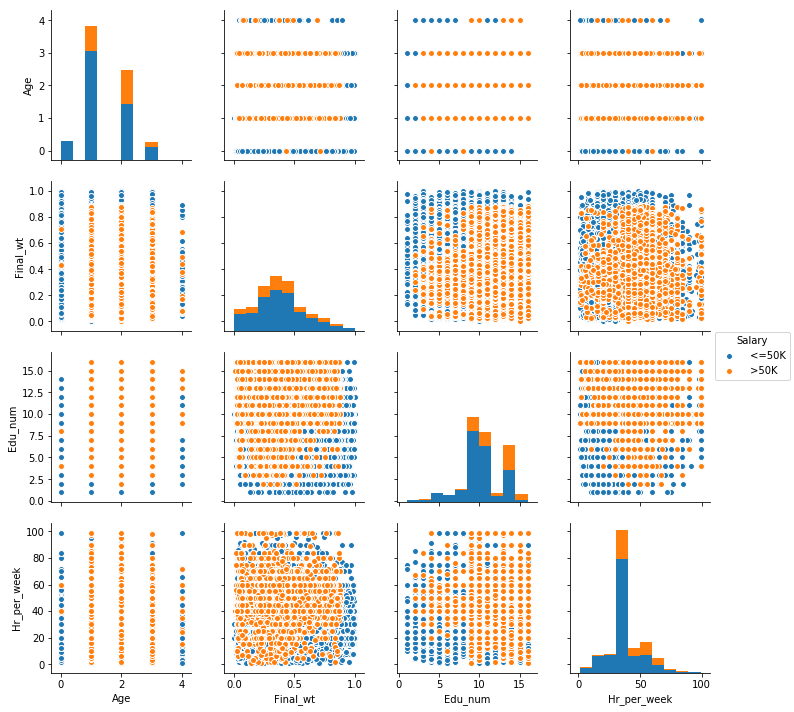

In [222]:
sns.pairplot(df, hue="Salary")